# 1. Importando bibliotecas necessárias para a aplicação   

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from PIL import Image

# 2. Definindo as funções que serão utilizadas

In [57]:
def white_pixels(binary_img):

    white_pixels = np.where(binary_img == 255)


    x_coords = white_pixels[1]
    y_coords = white_pixels[0]


    return x_coords, y_coords

In [58]:
def fit_line(ax, binary_img, color):

    x_coords, y_coords = white_pixels(binary_img)

    coeffs = np.polyfit(x_coords, y_coords, 1)
    poly_func = np.poly1d(coeffs)
    arctan = np.arctan(coeffs[0])
    degree = np.degrees(arctan)

    x_values = np.linspace(min(x_coords)-10, max(x_coords)+50, len(x_coords))

    ax.scatter(x_coords, y_coords, c='k', marker='o')
    ax.plot(x_values, poly_func(x_values), c=color, label=f"Angle: {(degree * (- 1)):.2f}")
    # ax.plot(x_values, poly_func(x_values), c=color)

    ax.legend(fontsize=16)
    ax.set_xlim(0, max(x_coords)+50)
    ax.set_ylim(min(y_coords),max(y_coords)+50)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True)

In [59]:
def count_white_segments(binary_img, filename):
    contours, _ = cv2.findContours(binary_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    num_white_segments = len(contours)
    print(f"Number of cracks: {num_white_segments}")

    fig, ax = plt.subplots(figsize=(4,4))
    colors = ['r', 'g', 'c', 'b', 'm', 'y', 'orange', 'brown', 'pink', 'purple', 'lime', 'navy', 'teal', 'olive', 'maroon', 'gold', 'silver', 'cyan', 'magenta', 'indigo']


    for i, contour in enumerate(contours):
        blank_image = np.zeros_like(binary_img)
        segment = cv2.drawContours(blank_image, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)
        color = colors[i % len(colors)]
        fit_line(ax, segment, color)

    ax.set_xlim(0, binary_img.shape[1])
    ax.set_ylim(binary_img.shape[0], 0)
    ax.set_xlabel('Pixels', fontsize=16)
    ax.set_ylabel('Pixels', fontsize=16)

    plt.savefig(filename, format='eps', bbox_inches='tight', pad_inches=0)

    plt.show()

In [60]:
def show_results(img_path):

    image = Image.open(img_path)
    binary_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    axs = plt.subplots(1, 2, figsize=(5, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Binary Image')

    filename = img_path.split('.')[0] + '.eps'
    print(filename)

    count_white_segments(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE), filename=filename)

In [61]:
def save_points(binary_img, filename):
    x_coords, y_coords = white_pixels(binary_img)

    with open(filename, 'w') as f:
        f.write('x,y\n')
        for x, y in zip(x_coords, y_coords):
            f.write(f'{x},{y}\n')

    print(f"Points saved to {filename}")

# 3. Exibindo os Resultados

/content/IMG_0127_segmentada.eps
Number of cracks: 1


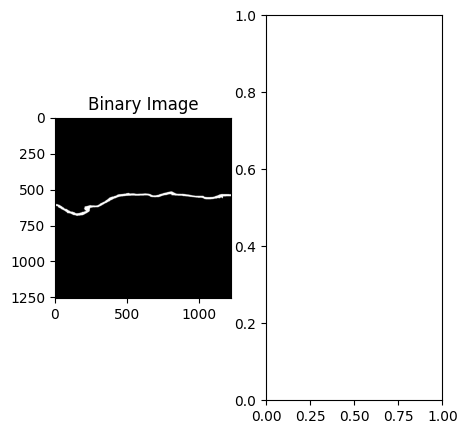

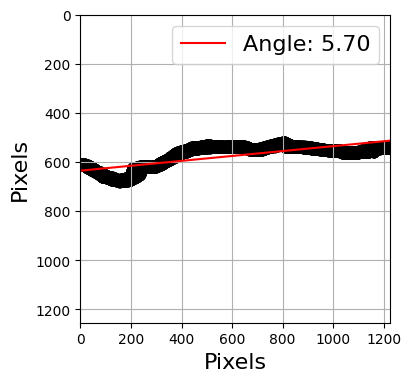

In [62]:
name = "/content/IMG_0127_segmentada.png"

show_results(name)

# 4. Salvando os pares ordenados em um arquivo csv

In [63]:
save_points(cv2.imread(name, cv2.IMREAD_GRAYSCALE), 'points.csv')

Points saved to points.csv
